In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collect_functions import *
from constants import *

## Dowload data

In [2]:
def download_data():
    !aws s3 cp s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/ data/videos --recursive

In [14]:
download_data()

download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/D4uiUJ/EgKY/INHCGj/zbg==.json to data/videos/D4uiUJ/EgKY/INHCGj/zbg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/2ujw70BpDdTGzp/TN/RL5g==.json to data/videos/2ujw70BpDdTGzp/TN/RL5g==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/+cY3RZNW8X9krnOj1Lv5yw==.json to data/videos/+cY3RZNW8X9krnOj1Lv5yw==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/8mqvDLqaYkKm/O9j6lcRfQ==.json to data/videos/8mqvDLqaYkKm/O9j6lcRfQ==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/AaOz6Ezrnl6wYfFXN9drZw==.json to data/videos/AaOz6Ezrnl6wYfFXN9drZw==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/5DIO9zwTDprrCtG+syERqg==.json to data/videos/5DIO9zwTDprrCtG+syERqg==.json
download: s3://bucketeer-a8bc3620-012c-4a16-be48-3d17178aa6b8/data/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json to data/videos/Aiw2YJ3Sy7wZQ/5AZyANqQ==.json
downlo

## Collect data in dataframes

In [2]:
# get data files
filenames = [y for x in os.walk(VIDEOS_PATH) for y in glob(os.path.join(x[0], '*.json'))]

store_all_df(filenames, agg_features="max", agg_survey=False)
store_all_time_series(filenames)

In [5]:
NB_PARTICIPANTS = len(df_generals)
print("We had {0} participations".format(NB_PARTICIPANTS))

We had 43 participations


In [6]:
df_features.head(6)

nb_timestamps  smile  innerBrowRaise  browRaise  browFurrow  \
user_id video_id                                                                
0       1                  1471    0.0             7.0        1.0         0.0   
        2                  1137   41.0            13.0        0.0         1.0   
        3                  1141    0.0             7.0        1.0         0.0   
1       1                  1146   39.0            14.0       44.0         6.0   
        2                   861    0.0            57.0        2.0         6.0   
        3                  1004    0.0            37.0       99.0         5.0   

                  noseWrinkle  upperLipRaise  lipCornerDepressor  chinRaise  \
user_id video_id                                                              
0       1                 0.0            0.0                 0.0        0.0   
        2                 0.0            0.0                 0.0        2.0   
        3                 0.0            0.0                 0.0        3.0   
1       1                 0.0            0.0                 0.0       15.0   
        2                 0.0            0.0                 4.0        2.0   
        3                 2.0            0.0                 1.0       95.0   

                  lipPucker  ...  mouthOpen  smirk  eyeClosure  attention  \
user_id video_id             ...                                            
0       1               0.0  ...        0.0    0.0         0.0       99.0   
        2               0.0  ...        0.0    3.0         0.0       99.0   
        3               1.0  ...        0.0    2.0        61.0       99.0   
1       1              59.0  ...        1.0   45.0        34.0       99.0   
        2              60.0  ...        0.0    0.0         0.0       99.0   
        3              52.0  ...       19.0  100.0        19.0       99.0   

                  lidTighten  jawDrop  dimpler  eyeWiden  cheekRaise  \
user_id video_id                                                       
0       1                0.0      1.0      4.0      99.0         0.0   
        2                0.0      1.0      1.0     100.0         1.0   
        3                0.0      1.0      2.0      37.0         0.0   
1       1                0.0      6.0      5.0       0.0        83.0   
        2                0.0      1.0     23.0       0.0         6.0   
        3                2.0      3.0     98.0       0.0        17.0   

                  lipStretch  
user_id video_id              
0       1                0.0  
        2                2.0  
        3                4.0  
1       1                7.0  
        2                0.0  
        3               85.0  

[6 rows x 22 columns]

In [7]:
df_answers.head(6)

fake/natural  stagnant/lively  inert/interactive  \
user_id video_id                                                     
0       1.0                4.0              3.0                3.0   
        2.0                3.0              3.0                4.0   
        3.0                2.0              3.0                4.0   
1       1.0                4.0              3.0                2.0   
        2.0                2.0              3.0                3.0   
        3.0                3.0              4.0                4.0   

                  unconscious/conscious  incompetent/competent  \
user_id video_id                                                 
0       1.0                         1.0                    5.0   
        2.0                         4.0                    3.0   
        3.0                         3.0                    4.0   
1       1.0                         2.0                    4.0   
        2.0                         2.0                    3.0   
        3.0                         4.0                    4.0   

                  unintelligent/intelligent  mechanical/organic  \
user_id video_id                                                  
0       1.0                             1.0                 1.0   
        2.0                             2.0                 2.0   
        3.0                             4.0                 3.0   
1       1.0                             3.0                 1.0   
        2.0                             3.0                 1.0   
        3.0                             4.0                 3.0   

                  unresponsive/responsive  foolish/sensible  \
user_id video_id                                              
0       1.0                           5.0               3.0   
        2.0                           4.0               3.0   
        3.0                           3.0               4.0   
1       1.0                           4.0               4.0   
        2.0                           3.0               4.0   
        3.0                           4.0               4.0   

                  ignorant/knowledgeable  machinelike/humanlike  \
user_id video_id                                                  
0       1.0                          1.0                    1.0   
        2.0                          3.0                    3.0   
        3.0                          4.0                    4.0   
1       1.0                          3.0                    1.0   
        2.0                          3.0                    1.0   
        3.0                          4.0                    3.0   

                  artificial/lifelike  dead/alive  unpleasant/pleasant  \
user_id video_id                                                         
0       1.0                       1.0         1.0                  4.0   
        2.0                       3.0         3.0                  4.0   
        3.0                       3.0         2.0                  3.0   
1       1.0                       2.0         2.0                  4.0   
        2.0                       1.0         2.0                  2.0   
        3.0                       4.0         4.0                  3.0   

                  ridig/smooth  dislike/like  irresponsible/responsible  \
user_id video_id                                                          
0       1.0                4.0           3.0                        5.0   
        2.0                2.0           4.0                        2.0   
        3.0                3.0           2.0                        4.0   
1       1.0                4.0           2.0                        5.0   
        2.0                2.0           2.0                        4.0   
        3.0                3.0           4.0                        4.0   

                  awful/nice  unfriendly/friendly  unkind/kind  
user_id video_id                                                
0       1.0              

In [8]:
df_generals.head(3)

,age,gender,robotRealLife
user_id,,,
0,24,Male,0
1,29,Male,1
2,22,Male,1


In [152]:
def collect_time_series(filenames, feature_name, video_id, agg="sum"):
    nb_participants = len(filenames)

    time_series_list = []
    # process one file at a time
    for idx, file in enumerate(filenames):
        with open(file) as json_file:
            video_data = json.load(json_file)["video"][video_id]
            
        time_series_list.append((collect_one_feature(video_data, aggregate=None)[feature_name]))
     
    # for each time_serie, change index and resample
    for idx, serie in enumerate(time_series_list):
        #set index to be a timestamp
        serie.index = pd.to_datetime(serie.index.values,unit="s")
        # resample to have one value for each second, 
        if agg == "sum":
            serie = serie.resample(axis="index", rule="s").sum()
        elif agg == "mean":
            serie = serie.resample(axis="index", rule="s").mean()
        else:
            raise ValueError("Aggregator should be either sum or mean")
        serie.index = serie.index.time
        time_series_list[idx] = serie
        
    result = pd.concat(time_series_list, axis=1, sort=False).T
    result["user_id"] = np.arange(nb_participants)
    result["video_id"] = video_id
    result.set_index(["user_id","video_id"], inplace=True)
    return result

In [123]:
agg = "sum"
for i in [0,3,6]:
    #set index to be a timestamp
    a[i].index = pd.to_datetime(a[i].index.values,unit="s")
    # resample to have one value for each second, 
    if agg == "sum":
        a[i] = a[i].resample(axis="index", rule="s").sum()
    elif agg == "mean":
        a[i] = a[i].resample(axis="index", rule="s").mean()
    else:
        raise ValueError("Aggregator should be either sum or mean")
    a[i].index = a[i].index.time

In [132]:
FEATURES

['smile',
 'innerBrowRaise',
 'browRaise',
 'browFurrow',
 'noseWrinkle',
 'upperLipRaise',
 'lipCornerDepressor',
 'chinRaise',
 'lipPucker',
 'lipPress',
 'lipSuck',
 'mouthOpen',
 'smirk',
 'eyeClosure',
 'attention',
 'lidTighten',
 'jawDrop',
 'dimpler',
 'eyeWiden',
 'cheekRaise',
 'lipStretch']

In [130]:
pd.concat([a[0], a[3], a[6]], axis=1, sort=False).T


,00:01:11,00:01:12,00:01:13,00:01:14,00:01:15,00:01:16,00:01:17,00:01:18,00:01:19,00:01:20,...,00:02:21,00:02:22,00:02:23,00:02:24,00:02:25,00:02:26,00:02:27,00:02:28,00:02:29,00:02:30
smile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
smile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
smile,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Data cleaning and analysis

In [9]:
# minimum lenght of the time series for proper analysis
threshold = 100
# number of non-meaning full videos
df_features[df_features.nb_timestamps < 100].nb_timestamps.count()

# TODO remove such videos, and their corresponding answers in the survey

5

### Features for each video and user

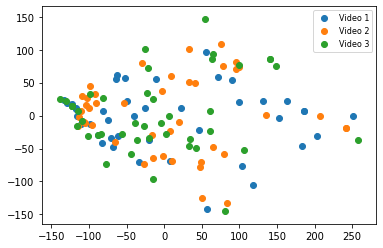

In [10]:
X = df_features.values[:,1:]
pca = PCA(n_components=2)
y = pca.fit_transform(X)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()

### Answers for each video and user

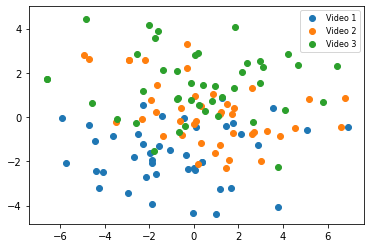

In [11]:
X = df_answers.values
pca = PCA(n_components=2)
y = pca.fit_transform(X)
colors = df_answers.index.get_level_values(1)
vid1 = plt.scatter(y[::3][:,0], y[::3][:,1])
vid2 = plt.scatter(y[1::3][:,0], y[1::3][:,1])
vid3 = plt.scatter(y[2::3][:,0], y[2::3][:,1])

plt.legend((vid1,vid2,vid3),
           ('Video 1', 'Video 2', 'Video 3'),
         fontsize=8)

plt.show()